<a href="https://colab.research.google.com/github/vladgap/LLC/blob/main/LLC%20simulation%20equilibrium%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
pip install MLNN

  Preparing metadata (setup.py) ... done
  Created wheel for MLNN: filename=MLNN-2.1-py3-none-any.whl size=7865 sha256=8ff3b52322f581165aa3a27c81213400acf83b1fb4791adebcb7a26766b52685
  Stored in directory: /root/.cache/pip/wheels/9e/e0/20/d5af76160e4e218d06f2277dc88a9dab41cb0b6e1d4221a58b
Successfully built MLNN


In [3]:
from MLNN import*

In [4]:
def CopyPasteToArray(a):
  if a.startswith('\n'):
    b=a[1:]
  else:
    b=a
  if b.endswith('\n'):
    b=b[:-1]
  c=b.replace('\t',',')
  d=c.split('\n')
  f=[]
  for e in d:
    if e.replace(',','').replace('.','').isdigit(): # only digits no letters
      f.append(list(eval(e)))
    else:
      f.append(e.split(','))
  return f

# EQUIL_rotem_lit1
lit data with NN model (7 hidden sigmoids)

In [ ]:
data1=pd.DataFrame(data=[
[63.5,	1.3,	42.4,	15.0],
[58.7,	1.2,	36.9,	13.8],
[52.0, 1.0,	27.7,	11.8],
[45.5,	1.0,	18.9,	9.6],
[39.1,	1.4,	10.2,	8.3],
[31.5,	1.5,	5.1,	8.8],
[22.9,	2.0,	2.3,	9.0],
[12.6,	2.2,	0.90,	9.3],
[6.3,	2.4,	0.45,	9.45],
[0.01,	2.6,	0.01,	9.6],
],
columns=['H3PO4_aq', 'solvent_aq', 'H3PO4_org', 'water_org'])

In [ ]:
data1.head()

H3PO4_aq  solvent_aq  H3PO4_org  water_org
0      63.5         1.3       42.4       15.0
1      58.7         1.2       36.9       13.8
2      52.0         1.0       27.7       11.8
3      45.5         1.0       18.9        9.6
4      39.1         1.4       10.2        8.3

In [ ]:
fig1=go.Figure()
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=data1[data1.columns[i]], name=data1.columns[i])) for i in range(1,4)]
fig1.update_layout(title='', width=1200, height=600,)
fig1.show()

In [ ]:
X1=np.array(data1)[:,[0]]
T1=np.array(data1)[:,[1,2,3]]

## Model

### scaling

In [ ]:
scaler_X1 = preprocessing.StandardScaler().fit(X1)
scaler_T1 = preprocessing.StandardScaler().fit(T1)

# scaler_X1.mean_, scaler_X1.scale_ = np.zeros(X1.shape[1]), np.ones(X1.shape[1]) # disable scaling
# scaler_T1.mean_, scaler_T1.scale_ = np.zeros(X1.shape[1]), np.ones(X1.shape[1]) # disable scaling

scaler_data1 = [scaler_X1.mean_, scaler_X1.scale_, scaler_T1.mean_, scaler_T1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data1[0], scaler_data1[1])
print('scaler T -- mean, stdev:  ',scaler_data1[2], scaler_data1[3])

X_sc1 = scaler_X1.transform(X1)
T_sc1 = scaler_T1.transform(T1)
X_sc1[0:3]

scaler X -- mean, stdev:   [33.211] [21.13387066]
scaler T -- mean, stdev:   [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


array([[1.433197  ],
       [1.20607344],
       [0.8890468 ]])

In [ ]:
def print_scaler_data(scaler_data):
    print('scaler X -- mean, stdev:  ',scaler_data[0], scaler_data[1])
    print('scaler T -- mean, stdev:  ',scaler_data[2], scaler_data[3])

### parameter searching

In [ ]:
bp_iter=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')
learning_rate = [0.05, 0.1, 0.5]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc1, T_sc1, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:362: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:445: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:445: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-11-162517e96d7f>:16: RuntimeWarning:

invalid value encountered in double_scalars



60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [ ]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
51            0.1           0.95                  0.0    0.009158   
52            0.1           0.95                  0.0    0.009779   
44            0.1           0.90                  0.0    0.011279   
33            0.1           0.80                  0.0    0.013050   
41            0.1           0.90                  0.0    0.013252   
..            ...            ...                  ...         ...   
87            0.5           0.95                  0.5    3.000000   
88            0.5           0.95                  0.5    3.000000   
76            0.5           0.90                  0.5    3.000000   
69            0.5           0.80                  0.5    3.000000   
66            0.5           0.80                  0.5    3.000001   

    relative_delta  
51   -3.675083e-02  
52   -6.611408e-02  
44   -4.087839e-02  
33   -2.094969e-02  
41   -1.947387e-02  
..             ...  
87   -1.480297e-14  
88    0.000000e+00  
76   -1.480297e-14  
69    2.960595e-14  
66   -5.358674e-12  

[90 rows x 5 columns]

In [ ]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

### running best parameters

In [ ]:
bp_iter=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc1, T_sc1, epochs=1500, learning_rate = 0.1, momentum_term = 0.95, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [ ]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

### best_weights_for_now

In [ ]:
best_weights_for_now2=weights_lists2[0] # 7 hidden
best_weights_for_now2

[[[-2.0660212883001776,
   -1.6226768167894392,
   -1.7288278192170072,
   -5.679086725741981,
   8.440973556419564,
   6.06596928153749,
   3.2408717932891693]],
 [[-4.396458624592707,
   -3.781082563455833,
   -4.813191297697299,
   3.7897860869993725,
   -4.738430541539828,
   1.2511161438309482,
   -4.420964593941897]],
 [[2.1354311190218356, -0.26822563709215624, 0.8008364543287613],
  [1.9109560603358866, 0.010936484437923784, -0.372480639679367],
  [1.7111250935173017, -0.08280636273390203, 0.5079974109811151],
  [-2.987695756949456, -0.29260453484471827, -2.585084233613376],
  [-3.0595517216408212, 0.7841457243855113, -0.725238433287311],
  [-1.2667854438003956, 0.4367980966665032, -0.620192177287721],
  [0.26710587754318454, 2.188339181641654, 2.612765359546577]],
 [[3.5485301632665274, -0.5854446320813577, 2.018070296132327]]]

In [ ]:
manual_best_weights_for_now2=[[[-4.215621245080982,
   -8.235086763118087,
   -1.6251342150606451,
   -6.9206357615871035,
   -3.4092427169369826,
   -7.4263402914028775,
   -3.7003458539301977]],
 [[0.8764395040443358,
   3.9145850159876945,
   -1.5013585830931442,
   -1.194371163565281,
   4.118411550251139,
   5.892242255497829,
   -6.755593628941706]],
 [[-2.6609909047049918, -0.44480776958732143, 1.9256391063013463],
  [2.566022222516618, -0.5042582093932455, -1.432212975592254],
  [1.405004033981333, -0.2988952466228391, 0.5807591718257896],
  [2.0692859230668117, -0.0780871568942863, -0.5145373287488922],
  [-0.7989625307881565, -1.957459884661486, -2.8991426864622065],
  [-0.5821795598385298, -0.22284877970127598, -0.9077232625087237],
  [1.619488070885094, 0.03697105802710269, 0.008613201857731975]],
 [[-0.4010006364699687, 2.4687577407660806, 2.995012357373033]]]

 # 7 relu
 # epochs=1000, learning_rate = 0.1, momentum_term = 0.95, learning_rate_decay = 0
 # loss = .00038

### fitting best parameters

In [ ]:
bp1=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')

In [ ]:
# bp1.import_weights(best_weights_for_now2)
bp1.import_weights(manual_best_weights_for_now2)
bp1.fit(X_sc1, T_sc1, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [ ]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(y=bp1.loss_list[20:], name=''))
print('Initial loss =', bp1.loss_list[0])
print('Final loss =', bp1.loss_list[-1])
# fig1.show()

Initial loss = 0.00038317489657026835
Final loss = 0.00038081061323728493


### prediction

In [ ]:
predics1=scaler_T1.inverse_transform(bp1.run(X_sc1))
predics1

array([[1.29918281e+00, 4.24818141e+01, 1.49962517e+01],
       [1.20153909e+00, 3.67329683e+01, 1.38077713e+01],
       [9.98853822e-01, 2.78389142e+01, 1.17944258e+01],
       [1.00094900e+00, 1.88213747e+01, 9.60332916e+00],
       [1.39837341e+00, 1.02414093e+01, 8.29734125e+00],
       [1.50272999e+00, 5.07996128e+00, 8.80178587e+00],
       [1.99276586e+00, 2.28913730e+00, 8.99802472e+00],
       [2.22136370e+00, 9.49095682e-01, 9.29600691e+00],
       [2.37724870e+00, 4.07546881e-01, 9.45913277e+00],
       [2.60699794e+00, 1.89286597e-02, 9.59614282e+00]])

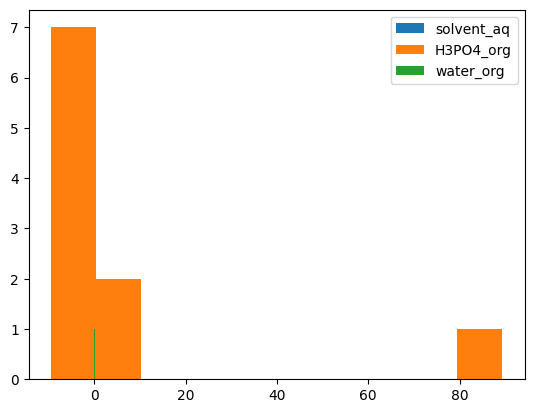

In [ ]:
pred=predics1
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T1[:,0])/T1[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T1[:,1])/T1[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T1[:,2])/T1[:,2]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.legend(['solvent_aq', 'H3PO4_org', 'water_org'])
plt.show()

In [ ]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("solvent_aq", "H3PO4_org", "water_org"), column_widths=[0.33, 0.33, 0.33],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T1[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T1[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T1[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 3)

fig.add_trace(go.Scatter(x=T1[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T1[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T1[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 3, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=350,
                  margin=dict(l=0, r=0, b=0, t=30))

# fig.update_xaxes(title_text="", range=[0.5, 2], row=1, col=1)
# fig.update_yaxes(title_text="", range=[0.5, 2], row=1, col=1)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=1, secondary_y=True, showgrid=False, tick0=-10, dtick=2)

# fig.update_xaxes(title_text="", range=[0, 30], row=1, col=2)
# fig.update_yaxes(title_text="", range=[0, 30], row=1, col=2)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=2, secondary_y=True, showgrid=False, tickvals=[-10,-5,-1,0,1,5,10])

# fig.update_xaxes(title_text="", range=[0.5, 2], row=1, col=3)
# fig.update_yaxes(title_text="", range=[0.5, 2], row=1, col=3)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=3, secondary_y=True, showgrid=False, tick0=-10, dtick=2)

fig.show()

In [ ]:
fig1=go.Figure()
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=data1[data1.columns[i]], name=data1.columns[i])) for i in range(1,4)]
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=predics1[:,i-1], name=data1.columns[i]+' predic')) for i in range(1,4)]
fig1.update_layout(title='', width=1200, height=600,)
fig1.show()

In [ ]:
bp1.print_weights()

Layers (input, hidden, output):  [1, 7, 3] sigmoid linear
Hidden layer weights:  [[-4.2162815777330085, -8.236427344741891, -1.6265562154077091, -6.926844604080739, -3.410136445138649, -7.427211500499821, -3.698373385957032]]
Hidden layer biases:  [[0.8749609721309338, 3.915066755231797, -1.5043851456784056, -1.1933274736382808, 4.11803087066856, 5.891291936612865, -6.7529352557888345]]
Outlet layer weights:  [[-2.6637624183906037, -0.44429745776758944, 1.925512185445992], [2.56652197535487, -0.5044852108445952, -1.4308467586235958], [1.4081943772224144, -0.2988396633936384, 0.5790139596771477], [2.0706074705294526, -0.07814100423571195, -0.5147035662833175], [-0.7994591758762682, -1.9576912892382201, -2.8993300894277243], [-0.5818666247735891, -0.22231346757065326, -0.906567414721736], [1.6164616666285654, 0.03723323842515629, 0.009502354390850938]]
Outlet layer biases:  [[-0.4010711584850023, 2.4680696956720007, 2.9941194913517157]]


In [ ]:
print (*scaler_data1)

[33.211] [21.13387066] [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


In [ ]:
print_scaler_data(scaler_data1)

scaler X -- mean, stdev:   [33.211] [21.13387066]
scaler T -- mean, stdev:   [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


# EQUIL_rotem_washing2

In [ ]:
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	H3PO4_org	water_org	solvent_aq	SO4_org
4.15	0.147	0.0733	9.6	2.5	0.0626
14.9	0.0806	0.359	9.5	2.2	0.0852
28.6	0.0329	1.68	9.3	1.9	0.0787
45.7	0.0106	8.31	8.5	1.6	0.0664
48.2	0.0078	10.7	8.5	1.3	0.0631
49.4	0.0058	12.2	8.7	1.0	0.0641
''')
# data
# data2=pd.DataFrame(data, columns=['H3PO4_aq',	'SO4_aq',	'H3PO4_org',	'water_org',	'solvent_aq',	'SO4_org'])
data2=pd.DataFrame(data[1:], columns=data[0])
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

In [ ]:
fig_equil2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2.show()

In [ ]:
X2=np.array(data2)[:,[0,1]]
T2=np.array(data2)[:,[2,3,4,5]]

In [ ]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2 = preprocessing.StandardScaler().fit(T2)

# scaler_X2.mean_, scaler_X2.scale_ = np.zeros(X2.shape[1]), np.ones(X2.shape[1]) # disable scaling
# scaler_T2.mean_, scaler_T2.scale_ = np.zeros(X2.shape[1]), np.ones(X2.shape[1]) # disable scaling

scaler_data2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2.mean_, scaler_T2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2 = scaler_T2.transform(T2)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667 9.01666667 1.75       0.07001667] [5.00466684 0.46338129 0.51234754 0.00872609]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

### 4 together - 2 hidden * 4

#### parameter searching

In [ ]:
bp_iter=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-33-04119081b553>:16: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:447: RuntimeWarning:

overflow encountered in matmul



80 81 82 83 84 85 86 87 88 89 

In [ ]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay    final_loss  \
72          0.050           0.90                  0.0  4.161835e-07   
60          0.050           0.80                  0.0  5.576600e-04   
52          0.010           0.95                  0.0  7.311247e-04   
61          0.050           0.80                  0.0  1.445393e-03   
54          0.010           0.95                  0.0  1.528576e-03   
..            ...            ...                  ...           ...   
7           0.005           0.80                  0.5  1.239570e+00   
37          0.010           0.80                  0.5  1.260008e+00   
9           0.005           0.80                  0.5  1.372799e+00   
8           0.005           0.80                  0.5  1.381795e+00   
6           0.005           0.80                  0.5  1.538081e+00   

    relative_delta  
72       -2.410900  
60       23.163702  
52        0.749821  
61        0.044396  
54        5.868545  
..             ...  
7        -0.013883  
37       -0.014693  
9        -0.016948  
8        -0.020927  
6        -0.015453  

[90 rows x 5 columns]

In [ ]:
# weights_list[64]

In [ ]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [ ]:
bp_iter=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2, epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [ ]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

#### best_weights_for_now

In [ ]:
best_weights_for_now3=weights_lists2[4] # 8 hidden
best_weights_for_now3

[[[-0.0852422060040097,
   -2.095371454537537,
   -0.8940760467090669,
   0.07481851590103587,
   0.1920480026939937,
   -2.491357007153018,
   3.607225672458022,
   0.27029345916419883],
  [-0.08974144728192802,
   -0.6537904394717223,
   2.553230265454962,
   0.08427543783242988,
   1.0774755067001371,
   -1.300120785477115,
   -1.7633506787619717,
   1.3402784595367796]],
 [[-0.12132239186477894,
   -0.04508517708240537,
   -6.649069917591205,
   -0.0559812254909276,
   -1.2292387090692325,
   1.2958071440786154,
   -3.1771031864953407,
   -1.2133234190045445]],
 [[0.11542400251752695,
   0.0024437869441217945,
   0.08746116417921412,
   0.09944329418514078],
  [-0.05000285926956599,
   -0.717240992893976,
   1.104687099671687,
   0.24116318390299032],
  [0.8335238465557626,
   1.3446449777577438,
   -1.833273630411827,
   0.016668557290331315],
  [-0.09781483449329097,
   -0.061870955926793494,
   0.14009454283417547,
   -0.006673148686100539],
  [0.07641781074885501,
   0.37851455

In [ ]:
manual_best_weights_for_now3=[[[0.1696720252705648,
   -0.5162308438477623,
   0.13610790853748875,
   -0.5459314437521549,
   -2.1522048507144826,
   2.7991812855017795,
   2.2522841303762253,
   1.3036289525897713],
  [1.9323970045933287,
   -0.08884458078459549,
   -0.04852345102466107,
   -1.13411282324348,
   -1.1158382553237762,
   -0.30779837858885173,
   -0.12173117756887028,
   -0.3540034590708585]],
 [[-2.2417610065610107,
   0.4613129251492482,
   -0.38183137933144556,
   0.20208421030007576,
   0.24825035116765534,
   -2.724270642622788,
   -1.4054454276875747,
   -1.495660228647515]],
 [[-0.09979718973451998,
   0.28011277994919526,
   0.4104045147375449,
   -2.1081691041207278],
  [-0.07462529108713224,
   0.1288590985174545,
   0.37672842958623576,
   0.3534601743451425],
  [-0.11173633889460348,
   0.00821047485908231,
   0.19900068654350242,
   -0.05106279558482743],
  [-0.373527746807881,
   0.7112152688917183,
   -0.714362680105141,
   -0.3971956188561637],
  [-0.7200547208576185,
   1.2845480318642744,
   0.01664600484698315,
   0.5938436742786131],
  [0.4953475705930187,
   2.2058959745264994,
   -1.9913671273187976,
   0.9877485984296825],
  [1.2259212443455991,
   -0.8667682552513223,
   -0.8898281887001765,
   -1.4867004920499955],
  [-0.013464260161279627,
   1.1730541754941695,
   -0.23926419164268528,
   1.5182593706861813]],
 [[0.19835057879125104,
   -1.1336610820808901,
   0.4964010766667916,
   0.46387402167019487]]]

 # 8 relu
 # epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0
 # loss = .0004

#### fitting best parameters

In [ ]:
bp2_01=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')

In [ ]:
# bp2_01.import_weights(best_weights_for_now3)
bp2_01.import_weights(manual_best_weights_for_now3)
bp2_01.fit(X_sc2, T_sc2, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [ ]:
fig2_01=go.Figure()
fig2_01.add_trace(go.Scatter(y=bp2_01.loss_list[20:], name=''))
print('Initial loss =', bp2_01.loss_list[0])
print('Final loss =', bp2_01.loss_list[-1])
# fig2_01.show()

Initial loss = 3.2222525733665536e-05
Final loss = 1.0807115992087763e-05


#### prediction

In [ ]:
predics2_01=scaler_T2.inverse_transform(bp2_01.run(X_sc2))
predics2_01

array([[ 0.0733155 ,  9.60000033,  2.50001381,  0.06260005],
       [ 0.35809626,  9.49998898,  2.19995344,  0.08519854],
       [ 1.68203167,  9.30002164,  1.9000836 ,  0.07870385],
       [ 8.30100461,  8.5001285 ,  1.59914058,  0.06637061],
       [10.71469499,  8.4992431 ,  1.30153448,  0.06313778],
       [12.19253051,  8.70060917,  0.99926404,  0.06408799]])

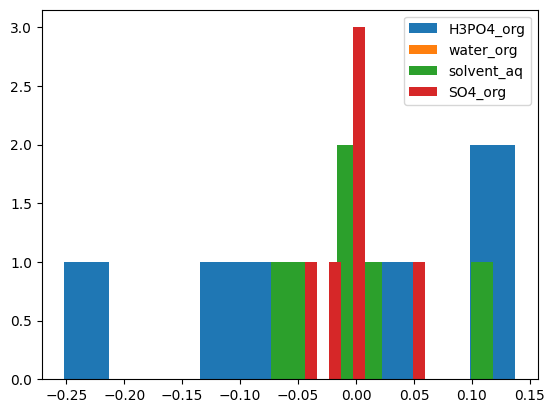

In [ ]:
pred=predics2_01
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T2[:,0])/T2[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T2[:,1])/T2[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T2[:,2])/T2[:,2]*100
predics1_y4=pred[:,3]
error1_y4=(predics1_y4-T2[:,3])/T2[:,3]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.hist(error1_y4)

plt.legend(['H3PO4_org','water_org','solvent_aq','SO4_org'])
plt.show()

In [ ]:
fig = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T2[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T2[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T2[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig.add_trace(go.Scatter(x=T2[:,3] , y=predics1_y4, mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig.add_trace(go.Scatter(x=T2[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,3] , y=error1_y3, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()

In [ ]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

#### mesh

In [ ]:
x_mesh, y_mesh = np.linspace(0, 50, 51), np.linspace(0, 0.15, 51)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh2 = x_mesh.flatten().reshape(51*51,1)
y_mesh2 = y_mesh.flatten().reshape(51*51,1)
mesh2_2=np.concatenate((x_mesh2, y_mesh2), axis=1)
# x_mesh[:5]

In [ ]:
mesh_predics2_01=scaler_T2.inverse_transform(  bp2_01.run( scaler_X2.transform(mesh2_2) )  )

In [ ]:
mesh_predics2_01

array([[-16.99129752,  12.4040406 ,   1.5227953 ,   0.09780696],
       [-16.4765317 ,  12.3188369 ,   1.52727516,   0.09718717],
       [-15.96176588,  12.23363321,   1.53175502,   0.09656737],
       ...,
       [  8.36672522,   8.54095758,   2.1772869 ,   0.0358565 ],
       [  9.15272068,   8.49071143,   2.12028386,   0.03400705],
       [  9.93871615,   8.44046529,   2.06328082,   0.03215759]])

In [ ]:
fig_equil2_2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,1], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,2], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,3], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2_2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2_2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2_2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2_2.show()

### 4 together - 5 hidden

#### parameter searching

In [ ]:
bp_iter=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-52-8a49181a082d>:16: RuntimeWarning:

invalid value encountered in double_scalars



72 73 74 75 

76 77 78 79 80 81 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square



82 83 84 85 86 87 88 89 

In [ ]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
60          0.050           0.80                  0.0    0.000794   
51          0.010           0.95                  0.0    0.002907   
64          0.050           0.80                  0.0    0.004028   
41          0.010           0.90                  0.0    0.006298   
22          0.005           0.95                  0.0    0.007030   
..            ...            ...                  ...         ...   
5           0.005           0.80                  0.5    2.326550   
16          0.005           0.90                  0.5    2.578733   
7           0.005           0.80                  0.5    2.970200   
9           0.005           0.80                  0.5    3.417633   
6           0.005           0.80                  0.5    3.702184   

    relative_delta  
60       39.810123  
51       -0.117732  
64       13.575449  
41       -0.179778  
22       -0.075276  
..             ...  
5        -0.022179  
16       -0.028529  
7        -0.013219  
9        -0.009163  
6        -0.005863  

[90 rows x 5 columns]

In [ ]:
# weights_list[64]

In [ ]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [ ]:
bp_iter=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2, epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-56-492ab6dbee7d>:8: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

#### best_weights_for_now

In [ ]:
best_weights_for_now4=weights_lists2[0] # 5 hidden
best_weights_for_now4

[[[nan, nan, nan, nan, nan], [nan, nan, nan, nan, nan]],
 [[nan, nan, nan, nan, nan]],
 [[nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan]],
 [[nan, nan, nan, nan]]]

In [ ]:
manual_best_weights_for_now4=[[[-0.49713918706342886,
   0.1950284001898634,
   0.3000286638538871,
   2.942836725200948,
   -1.777182367796712],
  [2.1234531580838945,
   -0.5308939551421104,
   1.5451518611127595,
   -0.43183539769698653,
   -1.353510483105784]],
 [[-5.943166311786588,
   0.5436660955058797,
   -1.505456576119919,
   -2.9099233142370085,
   0.63874921575053]],
 [[0.6631567120354075,
   1.7152225538132848,
   -1.926593325437448,
   0.2593021750619779],
  [0.1590583031187942,
   -0.3475279357013146,
   -0.8488900298997195,
   -0.9144956943161578],
  [-0.7480193778822165,
   1.0922520235074942,
   0.6924882000692089,
   -1.9518238819373117],
  [1.4121712190765998,
   1.8210598982444497,
   -2.656747328453359,
   0.026146767983708605],
  [-1.091064184783977,
   1.3878567618032225,
   0.2004093181868182,
   0.9479273709076199]],
 [[0.5932312645572166,
   -0.9965956124325036,
   0.5675174709474265,
   0.34346613214124766]]]

 # 5 relu
 # epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0
 # loss = .0004

#### fitting best parameters

In [ ]:
bp2_02=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')

In [ ]:
# bp2_02.import_weights(best_weights_for_now4)
bp2_02.import_weights(manual_best_weights_for_now4)
bp2_02.fit(X_sc2, T_sc2, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [ ]:
fig2_3=go.Figure()
fig2_3.add_trace(go.Scatter(y=bp2_02.loss_list[20:], name=''))
print('Initial loss =', bp2_02.loss_list[0])
print('Final loss =', bp2_02.loss_list[-1])
# fig2_3.show()

Initial loss = 0.003938660937267711
Final loss = 0.0029222844626381043


#### prediction

In [ ]:
predics2_02=scaler_T2.inverse_transform(bp2_02.run(X_sc2))
predics2_02

array([[ 0.07186016,  9.60019325,  2.50007771,  0.06260343],
       [ 0.35986341,  9.49952372,  2.19986901,  0.08517122],
       [ 1.67506092,  9.3016696 ,  1.90064512,  0.07880041],
       [ 8.34483912,  8.49066676,  1.59487439,  0.06586401],
       [10.64537953,  8.5148219 ,  1.30864071,  0.06394605],
       [12.22430494,  8.69324198,  0.99602245,  0.0637174 ]])

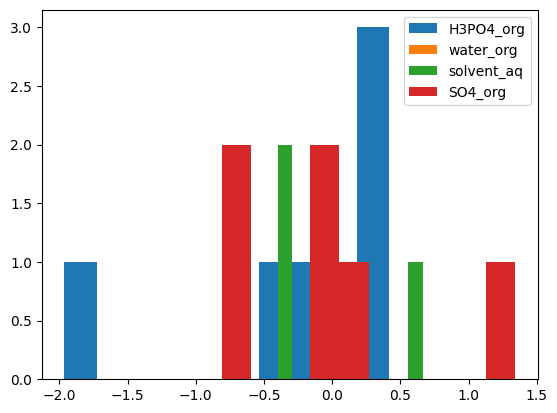

In [ ]:
pred=predics2_02
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T2[:,0])/T2[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T2[:,1])/T2[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T2[:,2])/T2[:,2]*100
predics1_y4=pred[:,3]
error1_y4=(predics1_y4-T2[:,3])/T2[:,3]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.hist(error1_y4)

plt.legend(['H3PO4_org','water_org','solvent_aq','SO4_org'])
plt.show()

In [ ]:
fig = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T2[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T2[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T2[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig.add_trace(go.Scatter(x=T2[:,3] , y=predics1_y4, mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig.add_trace(go.Scatter(x=T2[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,3] , y=error1_y3, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()

In [ ]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

#### mesh

In [ ]:
x_mesh, y_mesh = np.linspace(0, 50, 51), np.linspace(0, 0.15, 51)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh2 = x_mesh.flatten().reshape(51*51,1)
y_mesh2 = y_mesh.flatten().reshape(51*51,1)
mesh2_2=np.concatenate((x_mesh2, y_mesh2), axis=1)
# x_mesh[:5]

In [ ]:
mesh_predics2_02=scaler_T2.inverse_transform(  bp2_02.run( scaler_X2.transform(mesh2_2) )  )

In [ ]:
mesh_predics2_02

array([[-18.95883889,  11.72136432,   2.28440549,   0.10983304],
       [-18.39270372,  11.65418405,   2.26889551,   0.10890196],
       [-17.82656856,  11.58700377,   2.25338553,   0.10797088],
       ...,
       [  1.63832442,   9.48115456,   2.70013189,   0.04129478],
       [  1.57660418,   9.48978007,   2.70595791,   0.0410031 ],
       [  1.51488393,   9.49840557,   2.71178393,   0.04071141]])

In [ ]:
fig_equil2_3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,1], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,2], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,3], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2_3.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2_3.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2_3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2_3.show()

### H3PO4_org

In [ ]:
X2=np.array(data2)[:,[0,1]]
T2_1=np.array(data2)[:,[2]]

In [ ]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_1 = preprocessing.StandardScaler().fit(T2_1)

scaler_data2_1 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_1.mean_, scaler_T2_1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_1[0], scaler_data2_1[1])
print('scaler T -- mean, stdev:  ',scaler_data2_1[2], scaler_data2_1[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_1 = scaler_T2_1.transform(T2_1)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667] [5.00466684]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

In [ ]:
bp2_1=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [ ]:
bp2_1.fit(X_sc2, T_sc2_1, epochs=1000, learning_rate = 0.01, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_1.loss_list[0])
print('Final loss =', bp2_1.loss_list[-1])

Initial loss = 0.9861310021363209
Final loss = 0.025361924794908244


In [ ]:
bp2_1.export_weights()

[[[-0.010176770093161123, -1.4786220084694572],
  [-0.016439591411830934, -0.8086585553158072]],
 [[-0.12482437766272, 2.004490467400346]],
 [[-0.11020321138113698], [-1.3284317479209429]],
 [[2.6628150192553486]]]

In [ ]:
weights2_1=bp2_1.export_weights()

In [ ]:
manual_weights2_1=[[[1.7891568738335732, -1.1785291564925502],
  [-0.504929133439221, -0.4385439629245994]],
 [[-1.2274800854986472, 1.060820499155897]],
 [[1.5766657992281017], [-0.4638647113832393]],
 [[-0.12921146069478243]]]

# 2 hidden prelu
# Final loss = 0.00023878868378339208

manual_weights2_12=[[[0.1735491429461148, 1.8140938189194906],
  [-0.6530409129171293, -0.6441814583921941]],
 [[0.7411897128053353, -1.2033881701371891]],
 [[0.3516552639162472], [1.6547118904069311]],
 [[-1.0860308848681413]]]

# 2 hidden prelu
# Final loss = 0.00014

In [ ]:
# bp2_1.import_weights(weights2_1)
# bp2_1.import_weights(manual_weights2_1)
bp2_1.import_weights(manual_weights2_12)
predics2_1=scaler_T2_1.inverse_transform(bp2_1.run(X_sc2))

In [ ]:
# predics2_1, T2_1

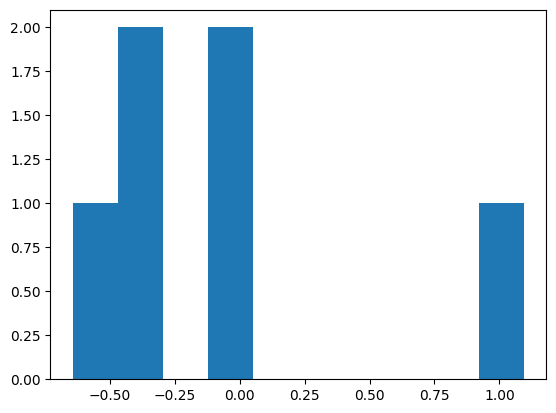

In [ ]:
error2_1=(predics2_1[:,0]-T2_1[:,0])/T2_1[:,0]*100
plt.hist(error2_1)
plt.show()

In [ ]:
mesh_predics2_1=scaler_T2_1.inverse_transform(  bp2_1.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_1

### water_org

In [ ]:
X2=np.array(data2)[:,[0,1]]
T2_2=np.array(data2)[:,[3]]

In [ ]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_2 = preprocessing.StandardScaler().fit(T2_2)

scaler_data2_2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_2.mean_, scaler_T2_2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_2[0], scaler_data2_2[1])
print('scaler T -- mean, stdev:  ',scaler_data2_2[2], scaler_data2_2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_2 = scaler_T2_2.transform(T2_2)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [9.01666667] [0.46338129]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

#### parameter searching

In [ ]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [ ]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
72          0.050           0.90                  0.0    0.008726   
89          0.050           0.95                  0.5    0.022642   
30          0.010           0.80                  0.0    0.025925   
31          0.010           0.80                  0.0    0.025961   
3           0.005           0.80                  0.0    0.025990   
..            ...            ...                  ...         ...   
6           0.005           0.80                  0.5    0.996992   
77          0.050           0.90                  0.5    0.999995   
18          0.005           0.90                  0.5    1.000002   
58          0.010           0.95                  0.5    1.000003   
75          0.050           0.90                  0.5    1.000014   

    relative_delta  
72   -6.638058e-03  
89   -4.775617e-03  
30   -9.908088e-02  
31   -2.371003e-02  
3     1.052974e-01  
..             ...  
6    -2.428704e-04  
77   -8.477604e-09  
18   -6.290499e-07  
58   -6.574724e-09  
75   -3.161161e-08  

[90 rows x 5 columns]

In [ ]:
weights_list[60]

[[[0.9700118892202322, -0.09680633630558713],
  [-0.31021374637972704, -0.05653178305481818]],
 [[0.5814683979350542, -0.10086388899390225]],
 [[-1.2317954923876075], [-0.13607004448221682]],
 [[1.149547088665998]]]

In [ ]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
bp2_2=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [ ]:
bp2_2.fit(X_sc2, T_sc2_2, epochs=1000, learning_rate = 0.005, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_2.loss_list[0])
print('Final loss =', bp2_2.loss_list[-1])

Initial loss = 1.0316840367613376
Final loss = 0.04729454515911719


In [ ]:
bp2_2.export_weights()

[[[0.48813528751887103, -1.0237336035366538],
  [-0.5917832756673898, -0.3622142883079124]],
 [[-0.07694369711778315, 1.5453916759021034]],
 [[-0.4858641595993044], [1.1401366854352237]],
 [[-1.5627604637480528]]]

In [ ]:
manual_weights2_2=[[[-2.3688210444515527, 2.098731394118159],
  [-1.1028505358197696, -4.289031245616676]],
 [[1.0951314669487642, -8.766706105459567]],
 [[0.7892953147766246], [-1.3482461942845092]],
 [[-0.9630528809172003]]]

# 2 hidden prelu
# Final loss = 0.026

manual_weights2_22=[[[-1.356083366626272, 2.1006456906712234],
  [-0.6309805208401018, -0.5374527149916659]],
 [[1.0515374304634164, -2.3182953246087115]],
 [[1.4841383017903245], [3.153523627853289]],
 [[-1.7074908699001965]]]

# 2 hidden prelu
# Final loss = 0.007

In [ ]:
bp2_2.import_weights(manual_weights2_22)
predics2_2=scaler_T2_2.inverse_transform(bp2_2.run(X_sc2))

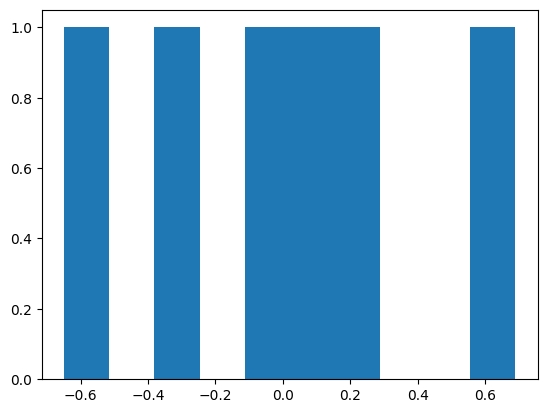

In [ ]:
error2_2=(predics2_2[:,0]-T2_2[:,0])/T2_2[:,0]*100
plt.hist(error2_2)
plt.show()

In [ ]:
mesh_predics2_2=scaler_T2_2.inverse_transform(  bp2_2.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_2

### solvent_aq

In [ ]:
X2=np.array(data2)[:,[0,1]]
T2_3=np.array(data2)[:,[4]]

In [ ]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_3 = preprocessing.StandardScaler().fit(T2_3)

scaler_data2_3 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_3.mean_, scaler_T2_3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_3[0], scaler_data2_3[1])
print('scaler T -- mean, stdev:  ',scaler_data2_3[2], scaler_data2_3[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_3 = scaler_T2_3.transform(T2_3)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [1.75] [0.51234754]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

#### parameter searching

In [ ]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_3, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [ ]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
71          0.050           0.90                  0.0    0.000002   
63          0.050           0.80                  0.0    0.000002   
61          0.050           0.80                  0.0    0.000002   
74          0.050           0.90                  0.0    0.003329   
54          0.010           0.95                  0.0    0.003835   
..            ...            ...                  ...         ...   
7           0.005           0.80                  0.5    0.886816   
5           0.005           0.80                  0.5    0.963243   
6           0.005           0.80                  0.5    0.996479   
23          0.005           0.95                  0.0    0.999917   
75          0.050           0.90                  0.5    1.000100   

    relative_delta  
71   -1.600212e-08  
63   -1.625062e-01  
61   -2.340400e-01  
74   -2.737695e-02  
54   -1.099378e-02  
..             ...  
7    -5.722511e-03  
5    -1.503189e-03  
6    -1.433365e-04  
23   -1.504610e-05  
75   -2.722416e-07  

[90 rows x 5 columns]

In [ ]:
weights_list[70]

[[[0.6076546954315003, 0.6152169914178309],
  [-1.0784523330442544, -0.9251052323557768]],
 [[0.36914699672672946, 0.6351565649261834]],
 [[-0.42012051709517123], [-0.7049826233530265]],
 [[1.1694900361656564]]]

In [ ]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
bp2_3=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [ ]:
bp2_3.fit(X_sc2, T_sc2_3, epochs=1000, learning_rate = 0.005, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_3.loss_list[0])
print('Final loss =', bp2_3.loss_list[-1])

Initial loss = 0.9777238714265134
Final loss = 0.07703555421129424


In [ ]:
bp2_3.export_weights()

[[[-1.2028052067654769, -0.2995173556206275],
  [-0.23221962423772655, -0.2245938436064151]],
 [[1.2332544841210173, -0.19011878634843854]],
 [[0.9773252763086556], [0.4985631259091393]],
 [[-1.2051959932354783]]]

In [ ]:
manual_weights2_3=[[[-1.0434539247186463, -0.840891516715229],
  [-0.22875054162539293, -0.12682741253900376]],
 [[1.1115656735349122, 0.7810694575866067]],
 [[0.6969716415327804], [0.5332714811363267]],
 [[-1.191251818678171]]]

# 2 hidden prelu
# Final loss = 0.077

manual_weights2_32=[[[2.0994823528593702, -1.2293957752203057],
  [-0.6972915446623457, 0.5216771334283966]],
 [[-2.3459563115354527, 1.775004898861346]],
 [[-3.1726827033207408], [0.4025651395234753]],
 [[-0.4638947231253712]]]

# 2 hidden prelu
# Final loss = 0

In [ ]:
bp2_3.import_weights(manual_weights2_32)
predics2_3=scaler_T2_3.inverse_transform(bp2_3.run(X_sc2))

In [ ]:
predics2_3[:,0]

array([2.49957267, 2.2011776 , 1.89891732, 1.60033243, 1.29999965,
       1.00000033])

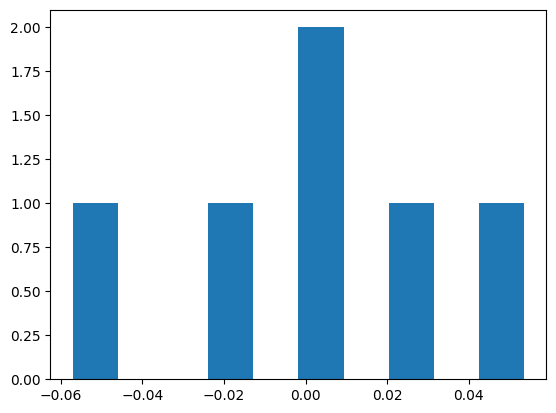

In [ ]:
error2_3=(predics2_3[:,0]-T2_3[:,0])/T2_3[:,0]*100
plt.hist(error2_3)
plt.show()

In [ ]:
mesh_predics2_3=scaler_T2_3.inverse_transform(  bp2_3.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_3

### SO4_org

In [ ]:
X2=np.array(data2)[:,[0,1]]
T2_4=np.array(data2)[:,[5]]

In [ ]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_4 = preprocessing.StandardScaler().fit(T2_4)

scaler_data2_4 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_4.mean_, scaler_T2_4.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_4[0], scaler_data2_4[1])
print('scaler T -- mean, stdev:  ',scaler_data2_4[2], scaler_data2_4[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_4 = scaler_T2_4.transform(T2_4)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [0.07001667] [0.00872609]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

#### parameter searching

In [ ]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.9, 0.95, 0.98]
learning_rate_decay = [0, 0.5]
repeats = range(10)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_4, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 180
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 

126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 

151 152 153 154 155 156 157 158 159 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-111-6c9d1525e5ca>:16: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul



160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 

176 177 178 179 

In [ ]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
41           0.005           0.98                  0.0    0.000859   
128          0.050           0.90                  0.0    0.003428   
61           0.010           0.90                  0.0    0.003565   
84           0.010           0.95                  0.0    0.004015   
85           0.010           0.95                  0.0    0.004015   
..             ...            ...                  ...         ...   
168          0.050           0.98                  0.0    1.100000   
167          0.050           0.98                  0.0    1.100000   
160          0.050           0.98                  0.0    1.100000   
161          0.050           0.98                  0.0    1.100000   
162          0.050           0.98                  0.0    1.100000   

     relative_delta  
41    -4.482378e-03  
128    0.000000e+00  
61    -1.963268e-02  
84    -4.752231e-13  
85    -7.854142e-11  
..              ...  
168    1.100000e+00  
167    1.100000e+00  
160    1.100000e+00  
161    1.100000e+00  
162    1.100000e+00  

[180 rows x 5 columns]

In [ ]:
weights_list[108]

[[[-5.68330092880978, -1.0416521632827032],
  [0.06356956501266314, 2.8369444964926847]],
 [[0.9715681628044227, -0.554251053181531]],
 [[0.8106332993272117], [-1.2763790227910212]],
 [[-0.6296260047036224]]]

In [ ]:
weights2_4=weights_list[108]

In [ ]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [ ]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 30
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2_4, epochs=3000, learning_rate = 0.05, momentum_term = 0.98, learning_rate_decay = 0.3, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [ ]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

In [ ]:
best_weights_for_now2_4=weights_lists2[13]
best_weights_for_now2_4

[[[3.992236448391335, 0.41601875397283655],
  [-1.3576589930019127, 2.6967401188983247]],
 [[-0.9981513103867002, -2.4196698794097715]],
 [[-0.5355706126466628], [-1.030516526107086]],
 [[1.349164036193706]]]

In [ ]:
bp2_4=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [ ]:
# bp2_4.export_weights()

In [ ]:
manual_weights2_4=[[[-0.16700158966413353, 1.1770332498659186],
  [1.4526084685823955, -0.9137197260973858]],
 [[-0.7468444598517179, 1.2452474051184519]],
 [[-1.3107172968906877], [-0.9375882900282885]],
 [[2.199196282499367]]]

# 2 hidden prelu
# Final loss = 0.1

manual_weights2_42=[[[-0.03998713454920765, -1.296313464466576],
  [1.3133609043926477, -0.5524389024009899]],
 [[-0.8849418689452931, 0.7889879563287986]],
 [[-1.576332174028801], [1.4492604070808766]],
 [[-0.7102506948766614]]]

# 2 hidden prelu
# Final loss = 0.002

manual_weights2_43=[[[-2.7308241499437758, 1.8373933992350313],
  [-2.021898044039464, -0.8845457922101067]],
 [[1.0694417308325381, 0.08920200363835196]],
 [[2.7835653102552724], [1.6175935763910405]],
 [[-4.969235753353272]]]
# 2 hidden prelu
# Final loss = 0.0008

In [ ]:
bp2_4.import_weights(manual_weights2_43)
# bp2_4.import_weights(best_weights_for_now2_4)
# bp2_4.import_weights(weights2_4)
predics2_4=scaler_T2_4.inverse_transform(bp2_4.run(X_sc2))

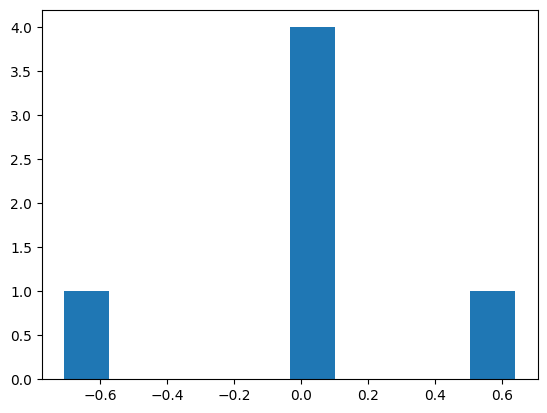

In [ ]:
error2_4=(predics2_4[:,0]-T2_4[:,0])/T2_4[:,0]*100
plt.hist(error2_4)
plt.show()

In [ ]:
mesh_predics2_4=scaler_T2_4.inverse_transform(  bp2_4.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_4

## Vizualization

In [ ]:
fig_equil2_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil2_err.add_trace(go.Scatter(x=T2[:,0] , y=predics2_1[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,1] , y=predics2_2[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,2] , y=predics2_3[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,3] , y=predics2_4[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil2_err.add_trace(go.Scatter(x=T2[:,0] , y=error2_1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,1] , y=error2_2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,2] , y=error2_3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,3] , y=error2_4, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil2_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil2_err.show()

In [ ]:
fig_equil2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_1[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_2[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_3[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_4[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

fig_equil2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))

fig_equil2.show()

In [ ]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

## output

In [ ]:
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667 9.01666667 1.75       0.07001667] [5.00466684 0.46338129 0.51234754 0.00872609]


In [ ]:
# H3PO4_org
bp2_1.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.1735491429461148, 1.8140938189194906], [-0.6530409129171293, -0.6441814583921941]]
Hidden layer biases:  [[0.7411897128053353, -1.2033881701371891]]
Outlet layer weights:  [[0.3516552639162472], [1.6547118904069311]]
Outlet layer biases:  [[-1.0860308848681413]]


In [ ]:
bp2_1.export_weights()

[[[0.1735491429461148, 1.8140938189194906],
  [-0.6530409129171293, -0.6441814583921941]],
 [[0.7411897128053353, -1.2033881701371891]],
 [[0.3516552639162472], [1.6547118904069311]],
 [[-1.0860308848681413]]]

In [ ]:
print('scaler T -- mean, stdev:  ',scaler_data2_1[2], scaler_data2_1[3])

scaler T -- mean, stdev:   [5.55371667] [5.00466684]


In [ ]:
# water_org
bp2_2.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-1.356083366626272, 2.1006456906712234], [-0.6309805208401018, -0.5374527149916659]]
Hidden layer biases:  [[1.0515374304634164, -2.3182953246087115]]
Outlet layer weights:  [[1.4841383017903245], [3.153523627853289]]
Outlet layer biases:  [[-1.7074908699001965]]


In [ ]:
bp2_2.export_weights()

[[[-1.356083366626272, 2.1006456906712234],
  [-0.6309805208401018, -0.5374527149916659]],
 [[1.0515374304634164, -2.3182953246087115]],
 [[1.4841383017903245], [3.153523627853289]],
 [[-1.7074908699001965]]]

In [ ]:
# solvent_aq
bp2_3.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[2.0994823528593702, -1.2293957752203057], [-0.6972915446623457, 0.5216771334283966]]
Hidden layer biases:  [[-2.3459563115354527, 1.775004898861346]]
Outlet layer weights:  [[-3.1726827033207408], [0.4025651395234753]]
Outlet layer biases:  [[-0.4638947231253712]]


In [ ]:
bp2_3.export_weights()

[[[2.0994823528593702, -1.2293957752203057],
  [-0.6972915446623457, 0.5216771334283966]],
 [[-2.3459563115354527, 1.775004898861346]],
 [[-3.1726827033207408], [0.4025651395234753]],
 [[-0.4638947231253712]]]

In [ ]:
# SO4_org
bp2_4.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-2.7308241499437758, 1.8373933992350313], [-2.021898044039464, -0.8845457922101067]]
Hidden layer biases:  [[1.0694417308325381, 0.08920200363835196]]
Outlet layer weights:  [[2.7835653102552724], [1.6175935763910405]]
Outlet layer biases:  [[-4.969235753353272]]


In [ ]:
bp2_4.export_weights()

[[[-2.7308241499437758, 1.8373933992350313],
  [-2.021898044039464, -0.8845457922101067]],
 [[1.0694417308325381, 0.08920200363835196]],
 [[2.7835653102552724], [1.6175935763910405]],
 [[-4.969235753353272]]]

# EQUIL_rotem_washing3
ניסויי הפרדה עם ממס מטוהר

In [8]:
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	H3PO4_org	water_org	solvent_aq	SO4_org
0.011	0.0932	0.072	8.69	1.70	0.0186
10.325	0.0017	0.229	10.66	1.52	0.02
10.380	0.0990	0.269	8.31	1.50	0.0208
19.821	0.0031	0.635	11.3	1.34	0.01884
19.710	0.0928	0.773	10.36	1.32	0.0195
28.710	0.0057	1.435	11.96	1.28	0.01978
27.882	0.0858	1.325	9.7	1.34	0.0222
35.611	0.0071	2.871	11.94	1.28	0.036
35.887	0.0846	2.981	12.02	1.24	0.0374
43.065	0.0082	5.328	12.12	1.28	0.057
43.065	0.0802	5.604	11.7	1.06	0.0608
49.966	0.0074	8.723	12.28	1.28	0.0872
0.017	0.1540	0.042	13.28	1.46	0.0164
4.831	0.0020	0.146	12.6	1.78	0.01302
4.941	0.1078	0.173	11.2	1.66	0.0139
19.600	0.0033	0.828	11.84	1.38	0.01688
19.766	0.1120	0.856	11.42	1.38	0.01832
''')
# data
# data2=pd.DataFrame(data, columns=['H3PO4_aq',	'SO4_aq',	'H3PO4_org',	'water_org',	'solvent_aq',	'SO4_org'])
data3=pd.DataFrame(data[1:], columns=data[0])
data3_names=CopyPasteToArray('''
wp12	wp21	wp22	wp31	wp32	wp41	wp42	wp51	wp52	wp61	wp62	wp71	wp13	ww11	ww12	ww21	ww22
''')
data3

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      0.011  0.0932      0.072       8.69        1.70  0.01860
1     10.325  0.0017      0.229      10.66        1.52  0.02000
2     10.380  0.0990      0.269       8.31        1.50  0.02080
3     19.821  0.0031      0.635      11.30        1.34  0.01884
4     19.710  0.0928      0.773      10.36        1.32  0.01950
5     28.710  0.0057      1.435      11.96        1.28  0.01978
6     27.882  0.0858      1.325       9.70        1.34  0.02220
7     35.611  0.0071      2.871      11.94        1.28  0.03600
8     35.887  0.0846      2.981      12.02        1.24  0.03740
9     43.065  0.0082      5.328      12.12        1.28  0.05700
10    43.065  0.0802      5.604      11.70        1.06  0.06080
11    49.966  0.0074      8.723      12.28        1.28  0.08720
12     0.017  0.1540      0.042      13.28        1.46  0.01640
13     4.831  0.0020      0.146      12.60        1.78  0.01302
14     4.941  0.1078      0.173      11.20        1.66  0.01390
15    19.600  0.0033      0.828      11.84        1.38  0.01688
16    19.766  0.1120      0.856      11.42        1.38  0.01832

In [32]:
fig_equil3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])
plot_data=data3[:13].copy()
text_data=data3_names[0][:13]
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='H3PO4_org-purified', text=text_data), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='blue', marker_symbol='circle', mode='markers', name='water_org-purified', text=text_data), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker_color='blue', marker_symbol='circle', mode='markers', name='solvent_aq-purified', text=text_data), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='SO4_org-purified', text=text_data), 2, 2)

plot_data=data3[13:].copy()
text_data=data3_names[0][13:]
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='H3PO4_org-washed', text=text_data), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='water_org-washed', text=text_data), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='solvent_aq-washed', text=text_data), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='SO4_org-washed', text=text_data), 2, 2)

fig_equil3.update_layout(title='', autosize=True,
                  width=810, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),

                  )

fig_equil3.update_layout(
    scene1_zaxis_range=[0,10],
    scene2_zaxis_range=[8,14],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

# fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))
fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-0.0001, y=-1.5, z=-0.0001))
fig_equil3.update_scenes(camera_projection_type="orthographic")
# fig_equil3.write_html("IAmOH equilibrium experim data 070823.html")


fig_equil3.show()

In [33]:
x_mesh, y_mesh = np.linspace(0, 60, 31), np.linspace(0, 0.2, 31) # expanded x and y extrapolation area observation
# x_mesh, y_mesh = np.linspace(0, 50, 31), np.linspace(0, 0.15, 31)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh3 = x_mesh.flatten().reshape(31*31,1)
y_mesh3 = y_mesh.flatten().reshape(31*31,1)
mesh3=np.concatenate((x_mesh3, y_mesh3), axis=1)
# x_mesh[:5]

In [34]:
X3=np.array(data3)[:,[0,1]]
T3=np.array(data3)[:,[2,3,4,5]]

In [35]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3 = preprocessing.StandardScaler().fit(T3)

scaler_data3 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3.mean_, scaler_T3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3[0], scaler_data3[1])
print('scaler T -- mean, stdev:  ',scaler_data3[2], scaler_data3[3])

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [ 1.89941176 11.25764706  1.4         0.02921412] [2.40216868 1.29836336 0.17875386 0.01997862]


## H3PO4_org

In [36]:
X3=np.array(data3)[:,[0,1]]
T3_1=np.array(data3)[:,[2]]

In [37]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_1 = preprocessing.StandardScaler().fit(T3_1)

scaler_data3_1 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_1.mean_, scaler_T3_1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_1[0], scaler_data3_1[1])
print('scaler T -- mean, stdev:  ',scaler_data3_1[2], scaler_data3_1[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_1 = scaler_T3_1.transform(T3_1)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [1.89941176] [2.40216868]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [38]:
bp3_1=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 0.9977723979243341
Final loss = 0.018615535425478235


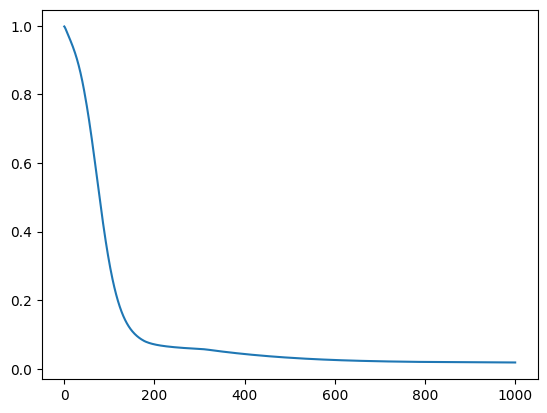

In [39]:
bp3_1.fit(X_sc3, T_sc3_1, epochs=1000, learning_rate = 0.001, momentum_term = 0.5, learning_rate_decay = 0)
print('Initial loss =', bp3_1.loss_list[0])
print('Final loss =', bp3_1.loss_list[-1])
plt.plot(bp3_1.loss_list)

In [40]:
bp3_1.export_weights()

[[[1.3291649964880303, -0.2578114459460104],
  [-0.027954832196722044, -0.02268862525226758]],
 [[-0.4471002423108141, 0.45027552398245513]],
 [[1.410106537083881], [-0.49488007538890927]],
 [[-0.3208520528861038]]]

In [41]:
weights3_1=bp3_1.export_weights()

In [42]:
manual_weights3_1=[[[1.3378100076012602, -0.23961073392218685],
  [0.04604608999058306, -0.01362935480464816]],
 [[-0.13967681304065602, 0.3658030173490756]],
 [[1.3443495997514352], [-0.4211945072460851]],
 [[-0.5176765751423951]]]

# 2 hidden prelu
# Final loss = 0.070

In [43]:
# bp3_1.import_weights(weights3_1)
bp3_1.import_weights(manual_weights3_1)
predics3_1=scaler_T3_1.inverse_transform(bp3_1.run(X_sc3))

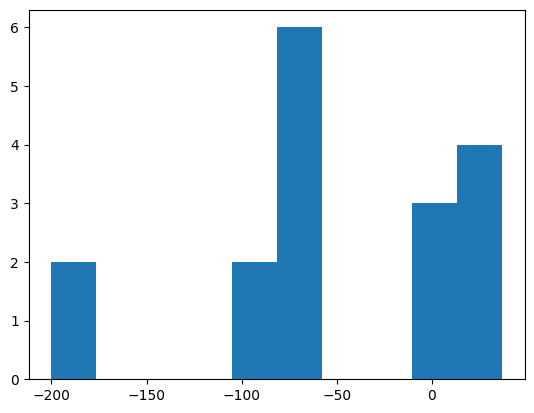

In [44]:
error3_1=(predics3_1[:,0]-T3_1[:,0])/T3_1[:,0]*100
plt.hist(error3_1)
plt.show()

In [45]:
mesh_predics3_1=scaler_T3_1.inverse_transform(  bp3_1.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_1

## water_org

In [46]:
X3=np.array(data3)[:,[0,1]]
T3_2=np.array(data3)[:,[3]]

In [47]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_2 = preprocessing.StandardScaler().fit(T3_2)

scaler_data3_2 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_2.mean_, scaler_T3_2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_2[0], scaler_data3_2[1])
print('scaler T -- mean, stdev:  ',scaler_data3_2[2], scaler_data3_2[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_2 = scaler_T3_2.transform(T3_2)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [11.25764706] [1.29836336]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [48]:
bp3_2=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.0296020079395558
Final loss = 0.72167281503165


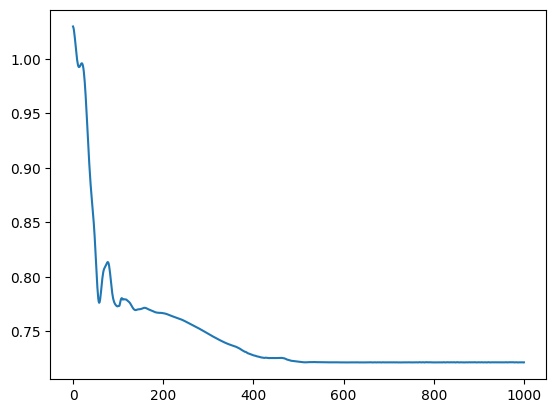

In [49]:
bp3_2.fit(X_sc3, T_sc3_2, epochs=1000, learning_rate = 0.001, momentum_term = 0.97, learning_rate_decay = 0)
print('Initial loss =', bp3_2.loss_list[0])
print('Final loss =', bp3_2.loss_list[-1])
plt.plot(bp3_2.loss_list)

In [50]:
bp3_2.export_weights()

[[[0.1989309084171387, 0.8699935406415941],
  [-0.8856603159892805, 0.7315790399392674]],
 [[0.4511990510371564, -0.7700582936212695]],
 [[0.7336144153016473], [1.3141644392175351]],
 [[-0.6045745256728445]]]

In [51]:
weights3_2=bp3_2.export_weights()

In [52]:
manual_weights3_2=[[[-0.003176245086173946, 0.922720194179483],
  [0.025836730938298032, -0.29271027455453025]],
 [[-0.162875602876959, 0.2764312267422203]],
 [[0.02925249535375607], [0.7985118883946332]],
 [[-0.4749218275525917]]]

# 2 hidden prelu
# Final loss = 0.72

In [53]:
# bp3_2.import_weights(weights3_2)
bp3_2.import_weights(manual_weights3_2)
predics3_2=scaler_T3_2.inverse_transform(bp3_2.run(X_sc3))

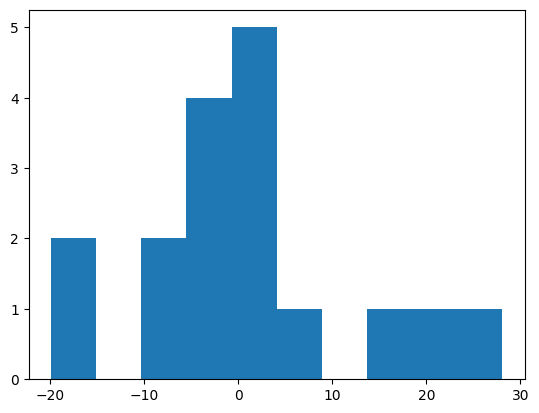

In [54]:
error3_2=(predics3_2[:,0]-T3_2[:,0])/T3_2[:,0]*100
plt.hist(error3_2)
plt.show()

In [55]:
mesh_predics3_2=scaler_T3_2.inverse_transform(  bp3_2.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_2

## solvent_aq

In [56]:
X3=np.array(data3)[:,[0,1]]
T3_3=np.array(data3)[:,[4]]

In [57]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_3 = preprocessing.StandardScaler().fit(T3_3)

scaler_data3_3 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_3.mean_, scaler_T3_3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_3[0], scaler_data3_3[1])
print('scaler T -- mean, stdev:  ',scaler_data3_3[2], scaler_data3_3[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_3 = scaler_T3_3.transform(T3_3)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [1.4] [0.17875386]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [58]:
bp3_3=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.0147529538834072
Final loss = 0.23780368771432922


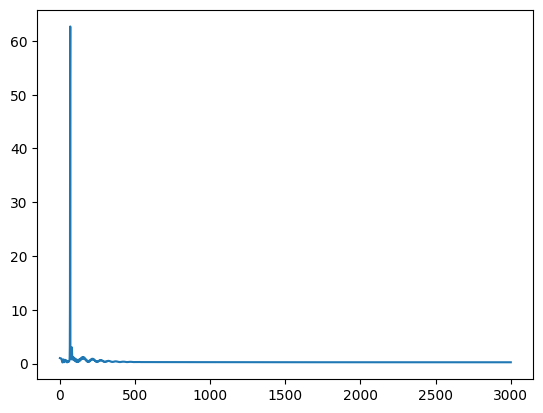

In [59]:
bp3_3.fit(X_sc3, T_sc3_3, epochs=3000, learning_rate = 0.01, momentum_term = 0.99, learning_rate_decay = 0)
print('Initial loss =', bp3_3.loss_list[0])
print('Final loss =', bp3_3.loss_list[-1])
plt.plot(bp3_3.loss_list)

In [60]:
bp3_3.export_weights()

[[[0.9198474761203496, 194.51004315617166],
  [8.427476716794871, 72.5671141577473]],
 [[-17.548666790476116, -414.525087561348]],
 [[12.176584422261794], [-4.882304739865923]],
 [[-1.810154638584154]]]

In [61]:
weights3_3=bp3_3.export_weights()

In [62]:
manual_weights3_3=[[[0.6217022345240342, 2.8386999598609814],
  [-0.6968938452576019, 5.596033242601742]],
 [[2.7109590937198265, 0.22193377952697202]],
 [[-0.9372090292368469], [-0.33293100862641933]],
 [[3.277263990359097]]]

# 2 hidden prelu
# Final loss = 0.093

In [63]:
# bp3_3.import_weights(weights3_3)
bp3_3.import_weights(manual_weights3_3)
predics3_3=scaler_T3_3.inverse_transform(bp3_3.run(X_sc3))

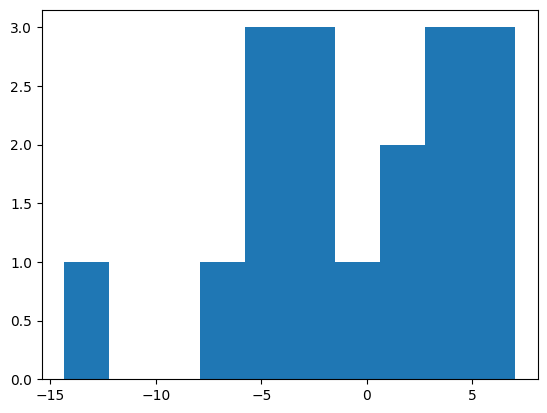

In [64]:
error3_3=(predics3_3[:,0]-T3_3[:,0])/T3_3[:,0]*100
plt.hist(error3_3)
plt.show()

In [65]:
mesh_predics3_3=scaler_T3_3.inverse_transform(  bp3_3.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_3

## SO4_org

In [66]:
X3=np.array(data3)[:,[0,1]]
T3_4=np.array(data3)[:,[5]]

In [67]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_4 = preprocessing.StandardScaler().fit(T3_4)

scaler_data3_4 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_4.mean_, scaler_T3_4.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_4[0], scaler_data3_4[1])
print('scaler T -- mean, stdev:  ',scaler_data3_4[2], scaler_data3_4[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_4 = scaler_T3_4.transform(T3_4)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [0.02921412] [0.01997862]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [68]:
bp3_4=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.0363113251631777
Final loss = 0.011507673017297902


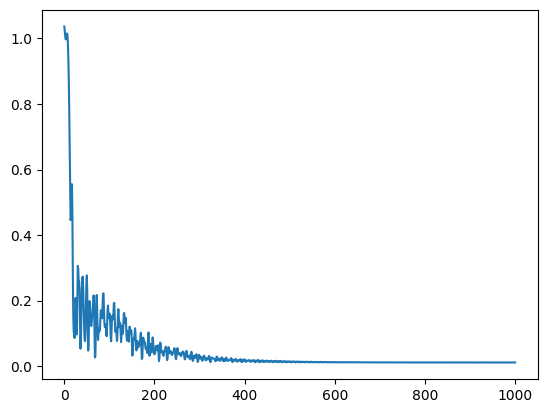

In [69]:
bp3_4.fit(X_sc3, T_sc3_4, epochs=1000, learning_rate = 0.01, momentum_term = 0.99, learning_rate_decay = 0)
print('Initial loss =', bp3_4.loss_list[0])
print('Final loss =', bp3_4.loss_list[-1])
plt.plot(bp3_4.loss_list)

In [70]:
bp3_4.export_weights()

[[[9.869769708963924, 1.9724659937465097],
  [13.71404901625349, -10.672216425346235]],
 [[-13.997593875011242, -11.412957205191232]],
 [[0.3399524859281406], [1.4177817521721288]],
 [[-0.5300562584778264]]]

In [71]:
weights3_4=bp3_4.export_weights()

In [72]:
manual_weights3_4=[[[0.044601620561964116, 9.065855748211808],
  [0.018485353223382184, 0.09664600884033867]],
 [[-0.1299251444151146, -3.493201184453457]],
 [[0.0699275541320634], [0.2892791954157]],
 [[-0.6633848526245624]]]

# 2 hidden prelu
# Final loss = 0.073

In [73]:
# bp3_4.import_weights(weights3_4)
bp3_4.import_weights(manual_weights3_4)
predics3_4=scaler_T3_4.inverse_transform(bp3_4.run(X_sc3))

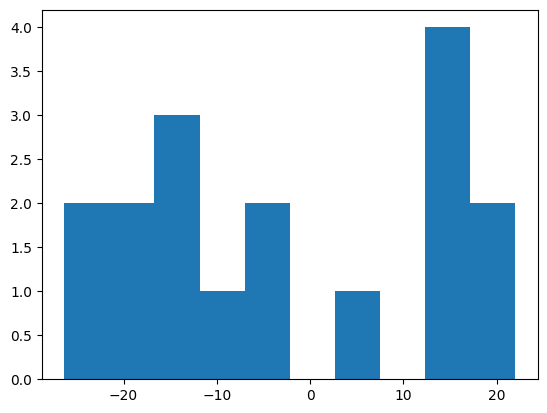

In [74]:
error3_4=(predics3_4[:,0]-T3_4[:,0])/T3_4[:,0]*100
plt.hist(error3_4)
plt.show()

In [75]:
mesh_predics3_4=scaler_T3_4.inverse_transform(  bp3_4.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_4

## Vizualization

In [76]:
fig_equil3_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil3_err.add_trace(go.Scatter(x=T3[:,0] , y=predics3_1[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,1] , y=predics3_2[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,2] , y=predics3_3[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,3] , y=predics3_4[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil3_err.add_trace(go.Scatter(x=T3[:,0] , y=error3_1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,1] , y=error3_2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,2] , y=error3_3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,3] , y=error3_4, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil3_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil3_err.show()

In [77]:
fig_equil3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.SO4_org, mode='markers', name='SO4_org'), 2, 2)

# visib='legendonly'
visib=True

fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_1[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,1)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_2[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,2)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_3[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,1)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_4[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,2)

fig_equil3.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil3.update_layout(
    scene1_zaxis_range=[0,10],
    scene2_zaxis_range=[8,14],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

# fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))
fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=0, y=-2.2, z=0))
# fig_equil3.update_scenes(camera_projection_type="orthographic")

fig_equil3.show()

## output

In [78]:
# H3PO4_org
bp3_1.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[1.3378100076012602, -0.23961073392218685], [0.04604608999058306, -0.01362935480464816]]
Hidden layer biases:  [[-0.13967681304065602, 0.3658030173490756]]
Outlet layer weights:  [[1.3443495997514352], [-0.4211945072460851]]
Outlet layer biases:  [[-0.5176765751423951]]


In [79]:
bp3_1.export_weights()

[[[1.3378100076012602, -0.23961073392218685],
  [0.04604608999058306, -0.01362935480464816]],
 [[-0.13967681304065602, 0.3658030173490756]],
 [[1.3443495997514352], [-0.4211945072460851]],
 [[-0.5176765751423951]]]

In [80]:
# water_org
bp3_2.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-0.003176245086173946, 0.922720194179483], [0.025836730938298032, -0.29271027455453025]]
Hidden layer biases:  [[-0.162875602876959, 0.2764312267422203]]
Outlet layer weights:  [[0.02925249535375607], [0.7985118883946332]]
Outlet layer biases:  [[-0.4749218275525917]]


In [81]:
bp3_2.export_weights()

[[[-0.003176245086173946, 0.922720194179483],
  [0.025836730938298032, -0.29271027455453025]],
 [[-0.162875602876959, 0.2764312267422203]],
 [[0.02925249535375607], [0.7985118883946332]],
 [[-0.4749218275525917]]]

In [82]:
# solvent_aq
bp3_3.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.6217022345240342, 2.8386999598609814], [-0.6968938452576019, 5.596033242601742]]
Hidden layer biases:  [[2.7109590937198265, 0.22193377952697202]]
Outlet layer weights:  [[-0.9372090292368469], [-0.33293100862641933]]
Outlet layer biases:  [[3.277263990359097]]


In [83]:
bp3_3.export_weights()

[[[0.6217022345240342, 2.8386999598609814],
  [-0.6968938452576019, 5.596033242601742]],
 [[2.7109590937198265, 0.22193377952697202]],
 [[-0.9372090292368469], [-0.33293100862641933]],
 [[3.277263990359097]]]

In [84]:
# SO4_org
bp3_4.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.044601620561964116, 9.065855748211808], [0.018485353223382184, 0.09664600884033867]]
Hidden layer biases:  [[-0.1299251444151146, -3.493201184453457]]
Outlet layer weights:  [[0.0699275541320634], [0.2892791954157]]
Outlet layer biases:  [[-0.6633848526245624]]


In [85]:
bp3_4.export_weights()

[[[0.044601620561964116, 9.065855748211808],
  [0.018485353223382184, 0.09664600884033867]],
 [[-0.1299251444151146, -3.493201184453457]],
 [[0.0699275541320634], [0.2892791954157]],
 [[-0.6633848526245624]]]